### Introduction to Data Science 2024: Assignment 1 
### Does smoking affect your lung capacity?
#### Andrea Schröter, kbn999


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#### Exercise 1

In [2]:
column_names = ['age','FEV1','height','gender','smoker','weight'] 
data = pd.read_csv("smoking.csv", names=column_names, sep='\t') # read data

# divide dataset into smokers and non-smokers

smokers = data[data["smoker"] == 1]

n_smokers = data[data["smoker"] == 0]

# compute average FEV1 scores

av_FEV1_smokers = smokers["FEV1"].sum()/len(smokers)

av_FEV1_n_smokers = n_smokers["FEV1"].sum()/len(n_smokers)

print(f"The average FEV1 value for smokers is {round(av_FEV1_smokers,2)}.")
print(f"The average FEV1 value for non smokers is {round(av_FEV1_n_smokers,2)}.")


The average FEV1 value for smokers is 3.28.
The average FEV1 value for non smokers is 2.57.



| Smoker | Mean FEV1 (liters)|
|--------|-----------------|
| Yes    | 3.28 |
| No     | 2.57 |

#### Explanation:

The observation that the average forced expiratory volume in one second (FEV1) for smokers (3.28) exceeds that of non-smokers (2.57) is unexpected. Generally, smoking is associated with negative effects on lung function, and one would anticipate a lower average FEV1 value among smokers compared to non-smokers. 

#### Exercise 2:


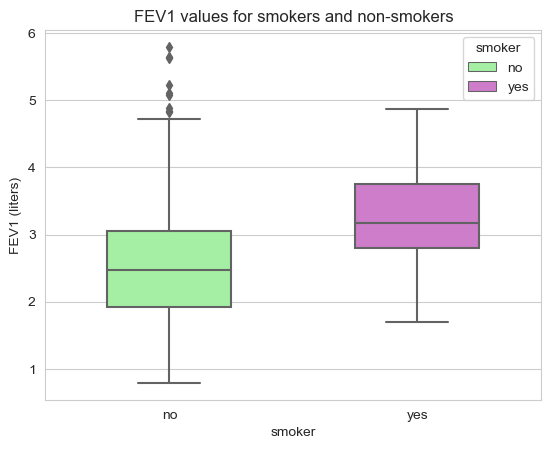

In [3]:
data['smoker'] = data['smoker'].replace({0: "no", 1: "yes"}) # change labels for smoker to yes and no 
'''Note that for the purpose of this assignment this did not affect the dataset. 
However, it would be better to keep binary values, e.g. for machine learning applications.''' 

# make box plots for FEV1 values of smokers and non-smokers
sns.set_style("whitegrid")
sns.boxplot(data=data, x="smoker", y="FEV1", hue="smoker", dodge=False, width=0.5,
            palette=["palegreen","orchid"]).set_title("FEV1 values for smokers and non-smokers")

plt.ylabel('FEV1 (liters)')
plt.show()

#### Explanation:
The boxplot above shows the distribution of FEV1 values for smokers and non-smokers. We can observe that the median FEV1 value (the 50th percentile) is lower for non-smokers (approx. 2.5 l) compared to smokers (approx. 3.2 l), suggesting a positive association between smoking and FEV1. Again, this is surprising because we would generally expect smoking to negatively impact the FEV1. Furthermore, the range of the data (as indicated by the whiskers) is wider for non-smokers, also exhibiting some outliers with very high FEV1 values. 

As we want to visualize and compare the distribution of the FEV1 value among two groups, box plots are a useful visualization method (cf. Wilke 2019). They offer insights beyond averages by providing information about the general distribution, spread, presence of outliers, and the range of the data.

#### Exercise 3

$H_0$: $μ_x$ = $μ_y$. Null hypothesis: The two populations (smokers and non-smokers) have the same mean regarding the FEV1 level. 

$H_1$: $μ_x$ $\neq$ $μ_y$. Alternative hypothesis: Smokers and non-smokers do not have the same mean regarding the FEV1 level.

In [4]:
def welshs_t(pop1,pop2): # conduct a Welsh's t-test for two populations

    # sample mean
    m1 = pop1.mean()
    m2 = pop2.mean()
    
    n1 = len(pop1) # sample size of pop1
    n2 = len(pop2) # sample size of pop2
    
    var1 = sum([(x - m1)**2 for x in pop1])/n1 # variance of pop1
    var2 = sum([(x - m2)**2 for x in pop2])/n2 # variance of pop2
    
    # compute t with a two-sample T-test (Welch's t-test)
    t = (m1-m2)/np.sqrt((var1/n1)+(var2/n2))
    
    # compute degrees of freedom
    v = np.floor(((var1/n1)+(var2/n2))**2/((var1**2/(n1**2 * (n1-1)))+(var2**2/(n2**2 *(n2-1)))))
    print(f"t-value: {round(t,2)}, degrees of freedom: {int(v)}")
    
    # compute the p-value 
    p = 2 * stats.t.cdf(-np.abs(t),v) 
    
    # reject H_0 if p < 0.05, accept otherwise
    
    accept = None 
    
    if p < 0.05:
        accept = 0
        print(f"The p-value is {p} < 0.05. We can therefore reject the null hypothesis.")
    else:
        accept = 1
        print(f"The p-value is {p} < 0.05. We can therefore accept the null hypothesis.")
    
    return t, v, p, accept
    
welshs_t(smokers["FEV1"],n_smokers["FEV1"])

t-value: 7.2, degrees of freedom: 83
The p-value is 2.4945644815271993e-10 < 0.05. We can therefore reject the null hypothesis.


(7.199031860999734, 83.0, 2.4945644815271993e-10, 0)

#### Discussion:
Applying the two-sided t-test (Welch's t-test) yields a t-value of 7.2, with 83 degrees of freedom and a p-value of 2.39 * $10^{-10}$ which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis that smokers and non smokers have the same mean FEV1 value. Instead, we accept the alternative hypothesis, indicating a significant difference in means, and implying that this difference is not due to chance alone. This outcome is unsurprising, given the observed variations in the box plot distributions and the calculated means.

Welch's t-test was chosen because it does not assume equal sample sizes or variances. Moreover, it is applicable when population means ($μ_x$ and $μ_y$) are unknown (cf. Hamelryck 2023). In this context, we are comparing the means of two independent samples without directional assumptions. Thus, the two-sided t-test is appropriate for our analysis.

#### Exercise 4

In [5]:
def correlation(var1,var2):
    m1 = var1.mean()
    m2 = var2.mean()
    
    cov = sum([(x-m1)*(y-m2) for x,y in zip(var1,var2)])/len(var1)
    sx = np.sqrt(sum([(x - m1)**2 for x in var1])/len(var1))
    sy = np.sqrt(sum([(y - m2)**2 for y in var2])/len(var2))
    
    correlation = cov/(sx*sy)
    return correlation

print(f"Correlation between FEV1 value and age for smokers: {correlation(smokers['FEV1'], smokers['age'])}")
print(f"Correlation between FEV1 value and age for non smokers: {correlation(n_smokers['FEV1'], n_smokers['age'])}")

# correlation between age and FEV1 value in general 
print(f"Correlation between FEV1 value and age for non smokers and smokers: {correlation(data['FEV1'], data['age'])}")

Correlation between FEV1 value and age for smokers: 0.24907515552578613
Correlation between FEV1 value and age for non smokers: 0.7815977186520335
Correlation between FEV1 value and age for non smokers and smokers: 0.7564589899896002


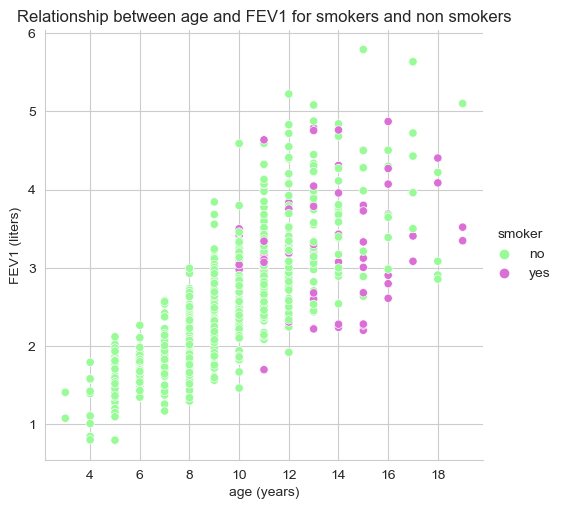

In [6]:
sns.set_style("whitegrid")
sns.relplot(data=data, x="age", y="FEV1", hue="smoker", palette=["palegreen","orchid"]) 
plt.ylabel('FEV1 (liters)')
plt.xlabel('age (years)')
plt.title("Relationship between age and FEV1 for smokers and non smokers")
plt.show()

#### Discussion:

The calculated Pearson's correlation coefficient between age and FEV1 value yields 0.25 for smokers and 0.78 for non-smokers. This indicates a strong positive correlation between these two variables for the non-smokers, meaning that as age increases, FEV1 increases. For smokers, this correlation is still positive, but weaker than for non-smokers. We would expect smoking to reduce lung function as indicated by the FEV1 value and therefore a less positive correlation between age and FEV1 value for smokers. The correlation between age and FEV1 for smokers and non smokers taken together is 0.76, indicating a strong positive correlation, which is only slightly lower than the correlation between these variables for non smokers only.

The scatterplot above visualizes the linear relationship between the continuous variables age and FEV1 values for smokers and non-smokers, making it a suitable visual display. We can observe a positive relation between age and FEV1 values for non-smokers, with data points seeming to be more spread out at higher age and FEV1 values. However, for smokers, the absence of data points below age 10 limits our ability to fully assess the relationship, suggesting caution in interpreting the results. As data points are generally more spread out with increasing values for age and FEV1, we cannot conclude that the relationship between age and FEV1 value is significantly weaker for smokers than non-smokers. It could be due to the fact that there are no smokers under the age of 10 in the dataset. Moreover, there are more data points for non smokers than for smokers which could explain why the overall correlation between age and FEV1 value is closer to the one calculated for smokers only.


#### Exercise 5

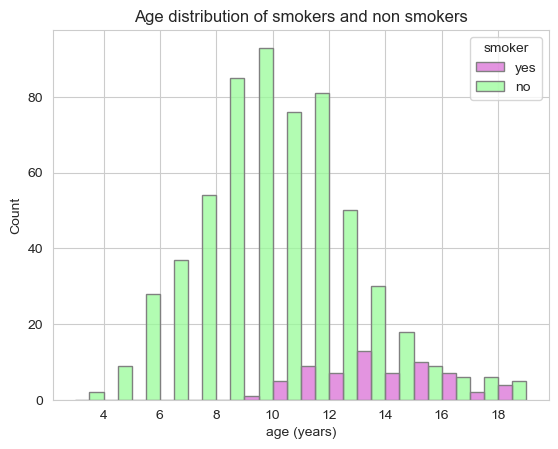

In [7]:
sns.set_style("whitegrid")
sns.histplot(data=data, x="age", hue="smoker", hue_order=["yes","no"],palette=["orchid","palegreen"],
             edgecolor="grey", bins=np.arange(data["age"].min(), data["age"].max() +1),
            multiple="dodge").set_title("Age distribution of smokers and non smokers")
plt.xlabel('age (years)')
plt.show()

#### Discussion:
The histogram above illustrates the distribution of the variable 'age' in the dataset and compares it between smokers and non-smokers. Since we aim to examine the distribution of a single variable, a histogram is a suitable choice for visualization (cf. Wilke 2019). It is evident that there are significantly more non-smokers represented in the dataset compared to smokers. The most frequent ages among non-smokers cluster around 9 years. Notably, the youngest smokers are 9 years old, with ages ranging from 9 to 18, whereas data for non-smokers span from 3 to 18 years.

In summary, the exercises reveal that smokers exhibit a (significantly) higher mean FEV1 value than non-smokers $^1$, and there exists a positive correlation between age and FEV1, with a stronger correlation observed among non-smokers. The weaker correlation between age and FEV1 for smokers is in line with our expectation that smoking negatively impacts lung function (cf. e.g. Kerstjens et al. 1997). However, the absence of data points for smokers below the age of 9 could impact the interpretation of the correlation between age and FEV1. The unexpectedly higher mean FEV1 value among smokers contrasts with the anticipated negative impact of smoking on lung function. However, as observed in the histogram, this discrepancy could be attributed to the older average age of smokers, potentially resulting in larger lung capacities and higher FEV1 values. However, there are several other factors that can influence the FEV1 value, e.g. the duration of smoking or the BMI (cf. Banerjee et al. 2014).

$^1$: There was only a two-sided t-test conducted for the mean FEV1 value between smokers and non smokers. We should additionaly conduct a one-sided t-test to test whether the mean FEV1 value is significantly higher for smokers compared to non smokers.

### References

Akhøj, M. (2023). IDS lecture 3: Statistics. Lecture Slides.

Banerjee, J., Roy, A., Singhamahapatra, A., Dey, P. K., Ghosal, A., & Das, A. (2014). Association of body mass index (BMI) with lung function parameters in non-asthmatics identified by spirometric protocols. Journal of clinical and diagnostic research: JCDR, 8(2), 12.

Hamelryck, T. (2023). IDS lecture 4: Hypothesis testing. Lecture Slides.

Kerstjens, H. A., Rijcken, B., Schouten, J. P., & Postma, D. S. (1997). Decline of FEV1 by age and smoking status: facts, figures, and fallacies. Thorax, 52(9), 820.

Wilke, C. O. (2019). Fundamentals of data visualization: a primer on making informative and compelling figures. O'Reilly Media.


ChatGPT version 3.5 was used as a writing assistance tool and to generate markdown tables. 